## Tutorial 
<a target="_blank" href="https://colab.research.google.com/github/ices-tools-dev/echoSMs/blob/main/docs/tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook provides an introductory tutorial for echoSMs.

In [3]:
!pip install echosms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.0/251.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.4 MB/s eta 0:00:00


## Imports

We import the modal series solution model from echoSMs and the benchmark data and reference models.

In [4]:
from echosms import MSSModel, BenchmarkData, ReferenceModels
import matplotlib.pyplot as plt
import numpy as np

## Reference models
The reference models in the Jech et al (2015) paper are available in the echoSMs package:

In [5]:
rm = ReferenceModels()
print('Available reference models are:\n')
print('\n'.join(rm.names()))

Available reference models are:

fixed rigid sphere
pressure release sphere
gas filled sphere
weakly scattering sphere
spherical fluid shell with pressure release interior
spherical fluid shell with gas interior
spherical fluid shell with weakly scattering interior
fixed rigid prolate spheroid
pressure release prolate spheroid
gas filled prolate spheroid
weakly scattering prolate spheroid
fixed rigid finite cylinder
pressure release finite cylinder
gas filled finite cylinder
weakly scattering finite cylinder
WC38.1 calibration sphere
Cu60 calibration sphere


## Benchmark results
Likewise, the results from the benchmark model runs in the Jech et al (2015) paper are available in the echoSMs package.

In [6]:
bm = BenchmarkData()
bmf = bm.freq_dataset  # this is a Pandas DataFrame
bmf

,Frequency_kHz,Sphere_Rigid,Sphere_PressureRelease,Sphere_Gas,Sphere_WeaklyScattering,ShellSphere_PressureRelease,ShellSphere_Gas,ShellSphere_WeaklyScattering,ProlateSpheroid_Rigid,ProlateSpheroid_PressureRelease,ProlateSpheroid_Gas,ProlateSpheroid_WeaklyScattering,Cylinder_Rigid,Cylinder_PressureRelease,Cylinder_Gas,Cylinder_WeaklyScattering
0,12,-54.44,-42.29,-42.34,-103.95,-42.83,-42.80,-99.15,-35.98,-30.16,NaN,-87.05,-38.75,-35.29,-35.30,-89.79
1,14,-52.20,-42.92,-42.93,-101.62,-43.40,-43.44,-96.79,-33.83,-30.02,NaN,-84.71,-36.83,-34.93,-34.93,-87.54
2,16,-50.40,-43.52,-43.52,-99.69,-43.96,-43.99,-94.83,-32.20,-29.87,NaN,-82.78,-35.45,-34.56,-34.56,-85.73
3,18,-48.96,-44.02,-44.03,-98.10,-44.49,-44.51,-93.20,-30.97,-29.70,NaN,-81.19,-34.51,-34.17,-34.18,-84.27
4,20,-47.85,-44.39,-44.40,-96.79,-44.94,-44.97,-91.85,-30.08,-29.54,NaN,-79.87,-33.95,-33.80,-33.81,-83.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,392,-45.96,-46.00,-46.03,-103.61,-46.91,-46.88,-108.29,NaN,NaN,NaN,-86.94,-21.74,-21.86,-21.92,-70.78
191,394,-45.86,-46.00,-45.96,-100.25,-46.91,-46.78,-107.19,NaN,NaN,NaN,-83.45,-21.72,-21.84,-21.83,-70.14
192,396,-45.80,-46.00,-46.07,-98.03,-46.91,-46.75,-106.49,NaN,NaN,NaN,-81.16,-21.70,-21.82,-21.82,-69.78
193,398,-45.80,-46.00,-45.96,-96.47,-46.91,-46.99,-106.14,NaN,NaN,NaN,-79.55,-21.68,-21.80,-21.79,-69.68


## Creating the model parameters

We can now get the model parameters and results for a given model in the Jech et al (2015) paper and run the same model using the echoSMs package and compare them. First step is to get the model parameters for a model - we choose the weakly scattering sphere for this example:

In [7]:

m = rm.parameters('weakly scattering sphere')
m

{'boundary_type': 'fluid filled',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.4,
 'target_rho': 1028.9,
 'target_c': 1480.3}

These parameters need to have an angle and frequency range added. We will use the frequencies from the Jech et al (2015) paper to make comparisons simplier.

In [ ]:
m['f'] = bm.freq_dataset['Frequency_kHz']*1e3
m['theta'] = 90
m

{'boundary_type': 'fluid filled',
 'a': 0.01,
 'medium_rho': 1026.8,
 'medium_c': 1477.4,
 'target_rho': 1028.9,
 'target_c': 1480.3,
 'f': 0       12000.0
 1       14000.0
 2       16000.0
 3       18000.0
 4       20000.0
          ...   
 190    392000.0
 191    394000.0
 192    396000.0
 193    398000.0
 194    400000.0
 Name: Frequency_kHz, Length: 195, dtype: float64,
 'theta': 90}

## Calculating target strength

The reference model for a weakly scattering sphere was the model series solution, so we create an instance of that model in echoSMs and get it to calculate the target strength as per the parameters in ``m``.


In [ ]:
mod = MSSModel()
ts = mod.calculate_ts(m)

## Comparison to existing target strength

These results can be compared to those from the Jech et al (2015) paper. We can also calculate the mean difference between the Jech values and those from the echoSMs calculations.

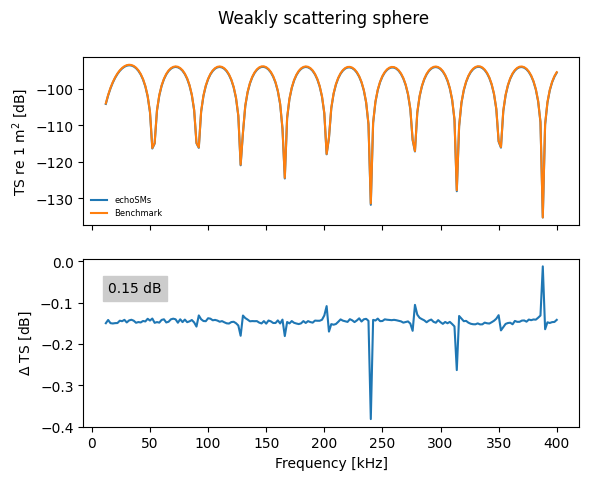

In [ ]:
jech_index = np.mean(np.abs(ts - bmf['Sphere_WeaklyScattering']))

fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(m['f']/1e3, ts, label='echoSMs')
axs[0].plot(bmf['Frequency_kHz'], bmf['Sphere_WeaklyScattering'], label='Benchmark')
axs[0].set_ylabel('TS re 1 m$^2$ [dB]')
axs[0].legend(frameon=False, fontsize=6)

axs[1].plot(m['f']*1e-3, ts-bmf['Sphere_WeaklyScattering'])
axs[1].set_xlabel('Frequency [kHz]')
axs[1].set_ylabel(r'$\Delta$ TS [dB]')
axs[1].annotate(f'{jech_index:.2f} dB', (0.05, 0.80), xycoords='axes fraction',
                    backgroundcolor=[.8, .8, .8])
_ = plt.suptitle('Weakly scattering sphere')

There is a 0.15 dB difference between the echoSMs results and those from the Jech et al (2015) paper. We don't know why (comparisons of other models and parameters give near identical results - it is just the weakly scattering models that don't agree).